# [EXP02] Histogram Equalization Operation

## Dependencies

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

## Test array / Test image

<IPython.core.display.Javascript object>


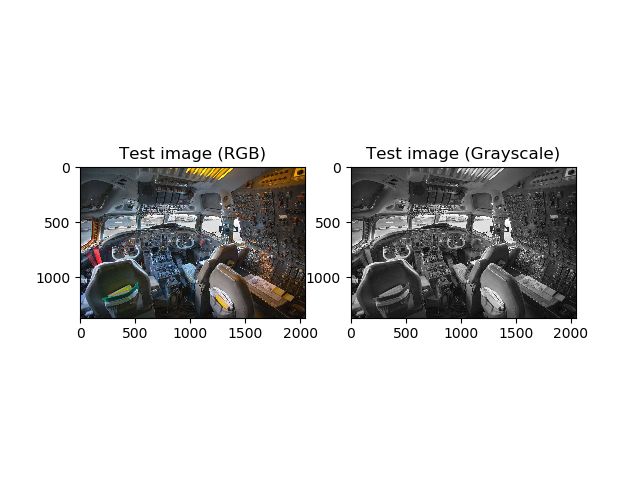

The test image consists of 1365 rows and 2048 columns in 3 channels
Image size (W x H) = 2048 x 1365


<IPython.core.display.Javascript object>


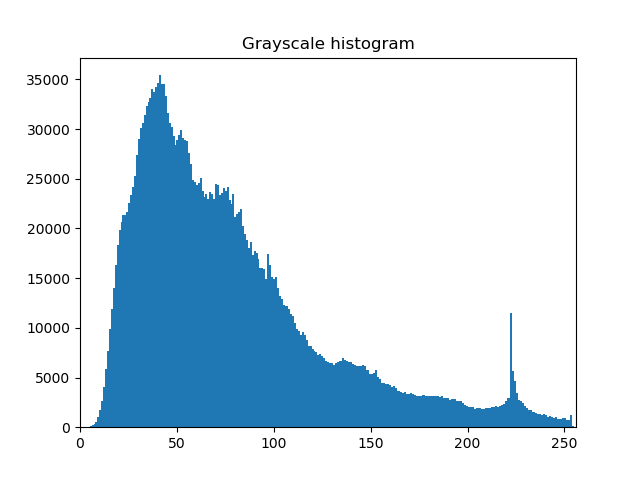

In [3]:
"""
#-- Uncomment for test array
img = np.array([[[2,2,2],[3,3,3],[3,3,3],[2,2,2]],
               [[4,4,4],[2,2,2],[4,4,4],[3,3,3]],
               [[3,3,3],[2,2,2],[3,3,3],[5,5,5]],
               [[2,2,2],[4,4,4],[2,2,2],[4,4,4]]],dtype='uint8')
img_max = 9
hist_bins = 10
hist_range = (0,10)
"""

#"""
#-- Uncomment for test image
img_select = '0_source.jpg'
img = cv2.imread(img_select)
img_max = 255
hist_bins = 256
hist_range = (0,256)
#"""

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(1)
plt.subplot(1,2,1)
plt.title('Test image (RGB)')
plt.imshow(img_rgb,vmin=0,vmax=img_max)
plt.subplot(1,2,2)
plt.title('Test image (Grayscale)')
plt.imshow(img_gray,'gray',vmin=0,vmax=img_max)

img_rows = img.shape[0]
img_cols = img.shape[1]
img_chs = img.shape[2]

print('The test image consists of {} rows and {} columns in {} channels'.format(img_rows,img_cols,img_chs))
print('Image size (W x H) = {} x {}'.format(img_cols,img_rows))

plt.figure(2)
plt.hist(img_gray.ravel(), bins=hist_bins),plt.gca().set_xlim(hist_range)
plt.title("Grayscale histogram") 
plt.show()

## Calculations for "Histogram Equalization" on the Grayscale image

In [4]:
# Histogram counts acquisition
counts,levels = np.histogram(img_gray,bins=hist_bins,range=hist_range)
levels = levels[:-1]

# Histogram counts normalization
sum_counts = 0
for count in counts:
    sum_counts += count
pdf = counts/sum_counts

cdf = pdf
cdf_value = 0
for index, pdf_value in enumerate(pdf):
    cdf_value += pdf_value
    cdf[index] = cdf_value

eqi = img_max * cdf

columns = levels.astype('int')
rows_name = np.array([['Intensity'],['Counts'],['Normalized'],['Circumulative'],['Equalized Int.']])
calc_results = np.append([columns],[counts,pdf,cdf,eqi.astype('int')],axis=0)
calc_results = np.append(rows_name,calc_results,axis=1)

calc_dataframe = pd.DataFrame(data=calc_results[1:,:],columns=calc_results[0,:])

calc_dataframe

Intensity                     0.0                     1.0  \
0          Counts                    13.0                    16.0   
1      Normalized  4.6502976190476195e-06  1.0373740842490843e-05   
2   Circumulative  4.6502976190476195e-06  1.0373740842490843e-05   
3  Equalized Int.                     0.0                     0.0   

                     2.0                     3.0                   4.0  \
0                   20.0                    32.0                  57.0   
1  1.752804487179487e-05  2.8974931318681317e-05  4.93646978021978e-05   
2  1.752804487179487e-05  2.8974931318681317e-05  4.93646978021978e-05   
3                    0.0                     0.0                   0.0   

                     5.0                     6.0                    7.0  \
0                  103.0                   217.0                  352.0   
1  8.620936355311354e-05  0.00016383356227106226  0.0002897493131868132   
2  8.620936355311354e-05  0.00016383356227106226  0.0002897493131868132   
3                    0.0                     0.0                    0.0   

                     8.0  ...               246.0               247.0  \
0                  572.0  ...              1003.0               874.0   
1  0.0004943624084249084  ...  0.9974087110805867  0.9977213541666673   
2  0.0004943624084249084  ...  0.9974087110805867  0.9977213541666673   
3                    0.0  ...               254.0               254.0   

                248.0              249.0               250.0  \
0               873.0              846.0               924.0   
1  0.9980336395375464  0.998336266597986  0.9986667954441398   
2  0.9980336395375464  0.998336266597986  0.9986667954441398   
3               254.0              254.0               254.0   

                251.0               252.0               253.0  \
0               935.0               721.0               748.0   
1  0.9990012591575098  0.9992591718177662  0.9995267427884622   
2  0.9990012591575098  0.9992591718177662  0.9995267427884622   
3               254.0               254.0               254.0   

             254.0               255.0  
0           1186.0               137.0  
1  0.9999509930174  1.0000000000000007  
2  0.9999509930174  1.0000000000000007  
3            254.0               255.0  

[4 rows x 257 columns]

## Apply the "Histogram Equalization" operation on the Grayscale image

In [5]:
img_output = np.zeros((img_gray.shape[0],img_gray.shape[1]))

for x in range(0,img_gray.shape[0]):
    for y in range(0,img_gray.shape[1]):
        old_intensity = img_gray[x][y]
        intensity_index = list(levels).index(old_intensity)
        img_output[x][y] = eqi[intensity_index]

## Display the results

<IPython.core.display.Javascript object>


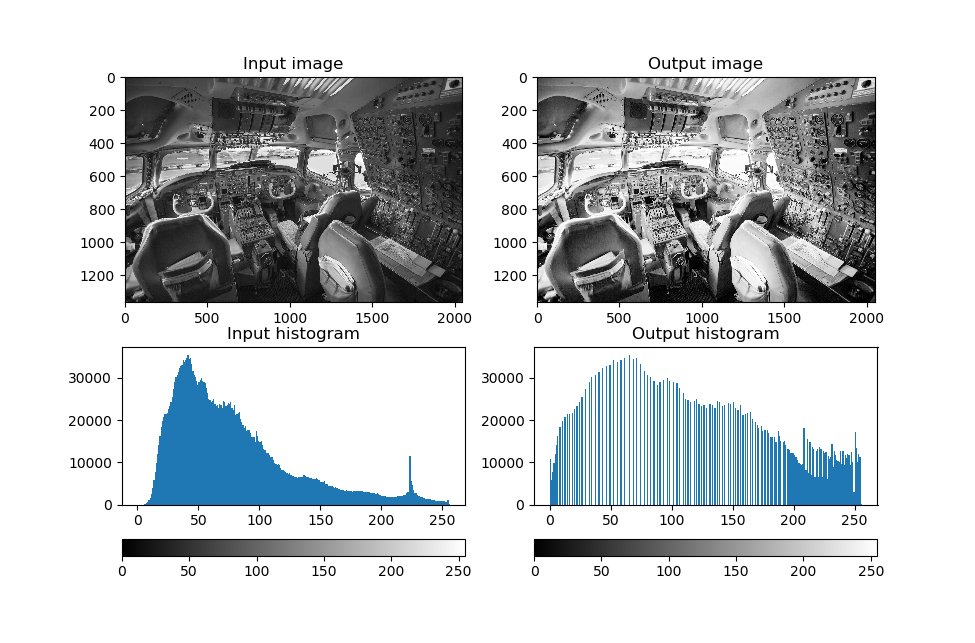

In [6]:
plt.figure(3)

plt.subplot(2,2,1),plt.title('Input image')
plt.imshow(img_gray,'gray',vmin=0,vmax=img_max)

plt.subplot(2,2,2),plt.title('Output image')
plt.imshow(img_output,'gray',vmin=0,vmax=img_max)

plt.subplot(2,2,3),plt.title('Input histogram')
plt.hist(img_gray.ravel(),hist_bins,hist_range),plt.colorbar(orientation='horizontal');

plt.subplot(2,2,4),plt.title('Output histogram')
plt.hist(img_output.ravel(),hist_bins,hist_range),plt.colorbar(orientation='horizontal');

## Save the results to image files

In [7]:
cv2.imwrite('1_input.jpg',img_gray)
cv2.imwrite('2_output.jpg',img_output)

True